## Data Visualization in R

If you are working in **JupyterHub**, you need to **library** the **ggplot2** package and **install and library** the **imputeTS** package to be able to run the code in this tutorial and complete this week's homework assignment.

If you are working in **RStudio**, you need to **install and library** the **ggplot2** and **imputeTS** packages to be able to run the code in this tutorial and complete this week's homework assignment.

To install packages in R, use the following syntax:

install.packages(‘name_of_package’)

For example:

In [1]:
install.packages('imputeTS')

If you encounter an **error message** such as **"package or namespace load failed for 'TTR'"** while
installing the imputeTS package, try:

In [3]:
install.packages('TTR')
install.packages('imputeTS')

also installing the dependencies ‘png’, ‘jpeg’, ‘gridtext’, ‘ggtext’, ‘stinepack’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



If you continue seeing an error message, **email me with a screenshot**.

Once your packages have been installed, don’t forget to **load them into your library**:

In [1]:
library(imputeTS)
library(ggplot2)

ERROR: Error in library(imputeTS): there is no package called ‘imputeTS’


### Part 1: World Health Organization Tuberculosis Dataset (HW data)

Let's copy the dataset from this URL using the **read_csv()** function from the **tidyverse** package: https://ist387.s3.us-east-2.amazonaws.com/data/who.csv

It contains a so-called **multivariate time series**: a sequence of measurements on 23 Tuberculosis-related (TB) variables captured repeatedly over time (1980-2013). We can learn more about each variable by consulting the dataset’s codebook which can be found here: https://ist387.s3.us-east-2.amazonaws.com/data/TB_data_dictionary_2021-02-06.csv.

In [51]:
library(tidyverse)
tb <- read_csv('https://ist387.s3.us-east-2.amazonaws.com/data/who.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




Let's take a look at the dimensions of the resulting **tb** dataframe: 

In [52]:
dim(tb)

[1] 5769   23

The output tells us there are 5,769 observations (rows) and 23 variables (columns). Let's continue exploring the data by, for example, taking a look at the first few observations (rows) with the **head()** function:

In [53]:
head(tb)

iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,⋯,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD,1989,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD,1990,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD,1991,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD,1992,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD,1993,15,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AD,1994,24,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Based on the snippet of data **head()** returns, it appears that the TB-related measurements were taken annually, since each observation (row) corresponds to a different year in the **tb$year** column.

If you take a look at the codebook posted here: https://ist387.s3.us-east-2.amazonaws.com/data/TB_data_dictionary_2021-02-06.csv, you may notice that the **tb$iso2** column contains country abbreviations. Since there are so many rows in the original dataset, let's restrict it to just observations from New Zealand.

The New Zealand ISO2 country code according to the list here: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2 is "NZ." Can you think of ways to **only select rows in tb where tb$iso2 == "NZ"**? The easiest way is to use **subsetting [ ]**:

In [54]:
tbNz <- tb[tb$iso2=="NZ",]

Let's check the dimensions of our new mini dataset:

In [55]:
dim(tbNz)

[1] 52 23

Much easier to work with! We can also check the types of variables we have:

In [56]:
str(tbNz)
summary(tbNz)

tibble [52 × 23] (S3: tbl_df/tbl/data.frame)
 $ iso2        : chr [1:52] NA NA NA NA ...
 $ year        : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp      : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m04  : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m514 : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m014 : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m1524: num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m2534: num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m3544: num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m4554: num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m5564: num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_m65  : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_mu   : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_f04  : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_f514 : num [1:52] NA NA NA NA NA NA NA NA NA NA ...
 $ new_sp_f014 : num [1:52] NA NA NA NA NA 

     iso2                year          new_sp         new_sp_m04
 Length:52          Min.   :1980   Min.   : 61.00   Min.   :0   
 Class :character   1st Qu.:1987   1st Qu.: 80.25   1st Qu.:0   
 Mode  :character   Median :1994   Median : 89.00   Median :0   
                    Mean   :1994   Mean   : 88.25   Mean   :0   
                    3rd Qu.:2001   3rd Qu.: 98.00   3rd Qu.:0   
                    Max.   :2008   Max.   :111.00   Max.   :0   
                    NA's   :23     NA's   :36       NA's   :49  
  new_sp_m514     new_sp_m014     new_sp_m1524     new_sp_m2534   
 Min.   :0.000   Min.   :0.000   Min.   : 3.000   Min.   : 1.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.: 6.000   1st Qu.: 3.250  
 Median :0.000   Median :1.000   Median : 8.500   Median : 5.500  
 Mean   :1.667   Mean   :1.571   Mean   : 7.929   Mean   : 6.714  
 3rd Qu.:2.500   3rd Qu.:2.750   3rd Qu.:10.000   3rd Qu.:10.000  
 Max.   :5.000   Max.   :5.000   Max.   :14.000   Max.   :14.000  
 NA's   :49

There seem to be a lot of NAs in our df. 

This expression locates (and reports to the console) all the missing data elements in the variable measuring the number of positive pulmonary smear tests for women aged 25-34:

In [57]:
tbNz$new_sp_f2534[is.na(tbNz$new_sp_f2534)]
#there are 38 data points missing

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA

Here is where the R package **imputeTS** comes into play. It was specifically designed to repair missing values in time series data. We will use this instead of mean substitution.  <br>
The **na_interpolation()** function in this package takes advantage of a unique characteristic of time series data: **neighboring points in time can be used to “guess” about a missing value in between**.

Usin **na_interpolation()**, we will "fill in" missing values in the **new_sp_f2534** column and save our results so the column gets updated:

In [58]:
tbNz$new_sp_f2534 <- na_interpolation(tbNz$new_sp_f2534)

When we check for NAs in that column now, we shouldn't see any anymore:

In [59]:
tbNz$new_sp_f2534[is.na(tbNz$new_sp_f2534)]
#there are 0 data points missing

numeric(0)

### Time to visualize some data!

Let's create a **line chart** of **tbNz$new_sp_f2534** over time. We will use the **ggplot2** package we installed and libraried in the beginning.

We’ll do it step-by-step first so you can see how **ggplot** works – in **layers**, relying on **3 key elements**: **data**,
**aesthetics (aes)**, and **geometry (geom)**.


**Step 1**: Tell ggplot which dataset you want to use – this will generate a **“blank canvas”** because we
haven’t told ggplot what we want along the x- and y-axes yet, i.e. **we haven’t specified any aesthetics**
– that’s Step 2.

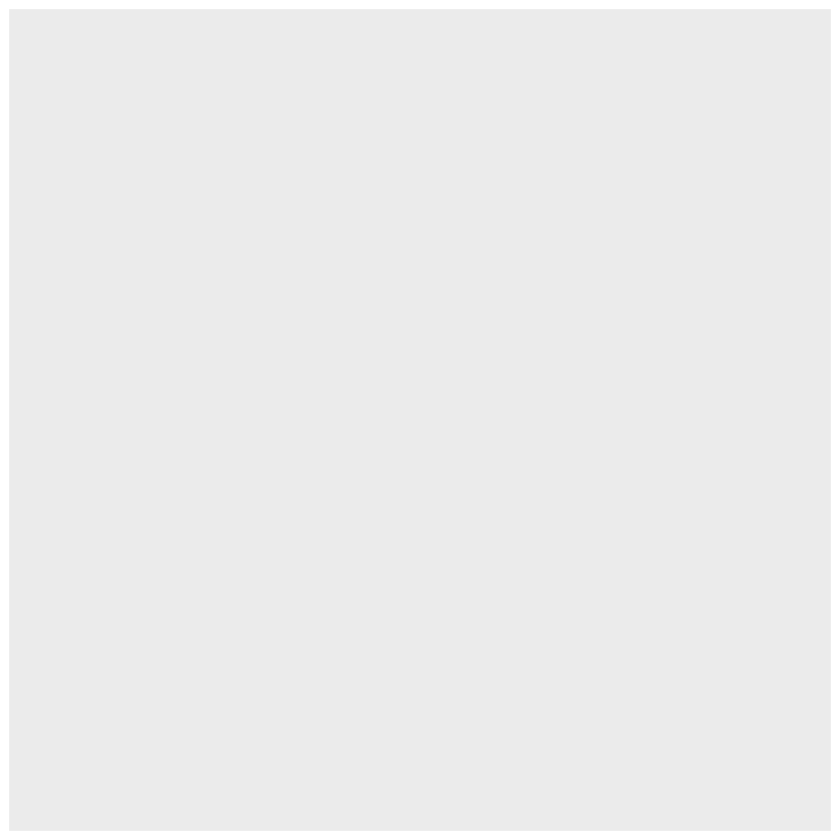

In [60]:
myPlot <- ggplot(tbNz)
myPlot

**Step 2**: Specify the x- and y-axes through the **aesthetics()** function:

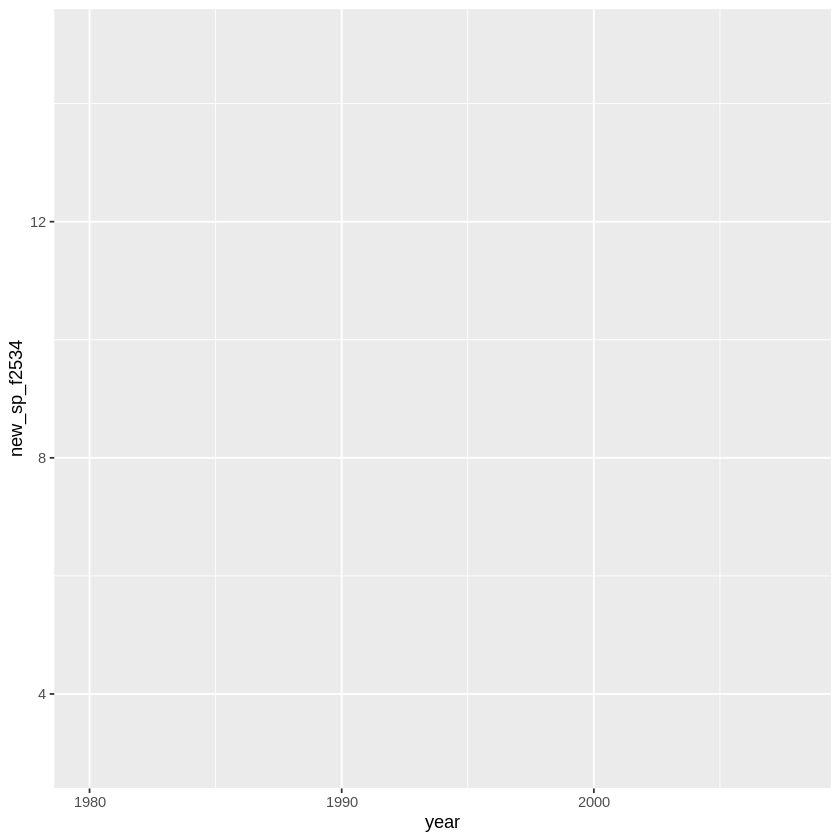

In [61]:
myPlot <- myPlot + aes(x=year, y=new_sp_f2534)
myPlot

**Step 3**: We don’t see a blank canvas anymore, but there is no chart yet either. 

That’s because we have not told ggplot **what type of a chart** we want. This is done through the **geometry()** function:

Warning message:
“Removed 23 row(s) containing missing values (geom_path).”


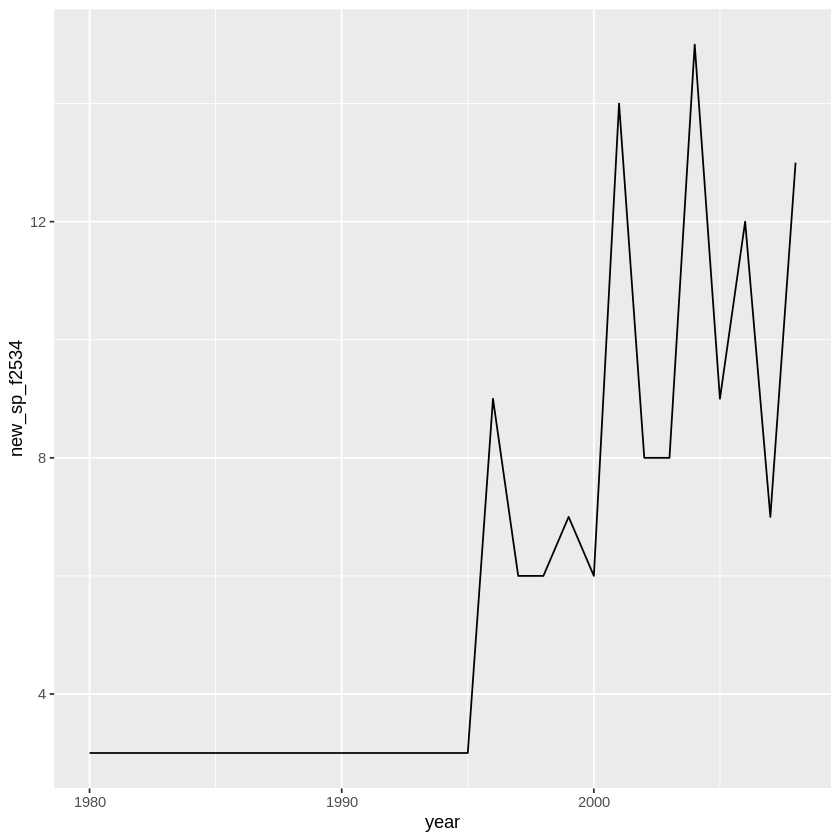

In [62]:
myPlot <- myPlot + geom_line()
myPlot

Let’s do a quick check to verify the plot is correct. Try to identify the **year with the highest number of positive TB tests** by inspecting your line chart. Then compare it to the maximum value in the data by using the **which.max()** function we’ve used before:

In [64]:
tbNz[which.max(tbNz$new_sp_f2534),]

iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,⋯,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NZ,2004,111,NA,NA,3,10,13,10,6,⋯,NA,NA,0,10,15,4,4,1,13,NA


What is the meaning of this expression? 

**Answer**: We created a subset [] of the **tbNz** data which contains all columns (since there is nothing specified to the right of the [,]) **but only the row with max value in the new_sp_f2534 column**. Can you guess how you can generate a similar subset for the lowest value in this column?

### Let’s change the color of our line


Warning message:
“Removed 23 row(s) containing missing values (geom_path).”
Warning message:
“Removed 23 row(s) containing missing values (geom_path).”


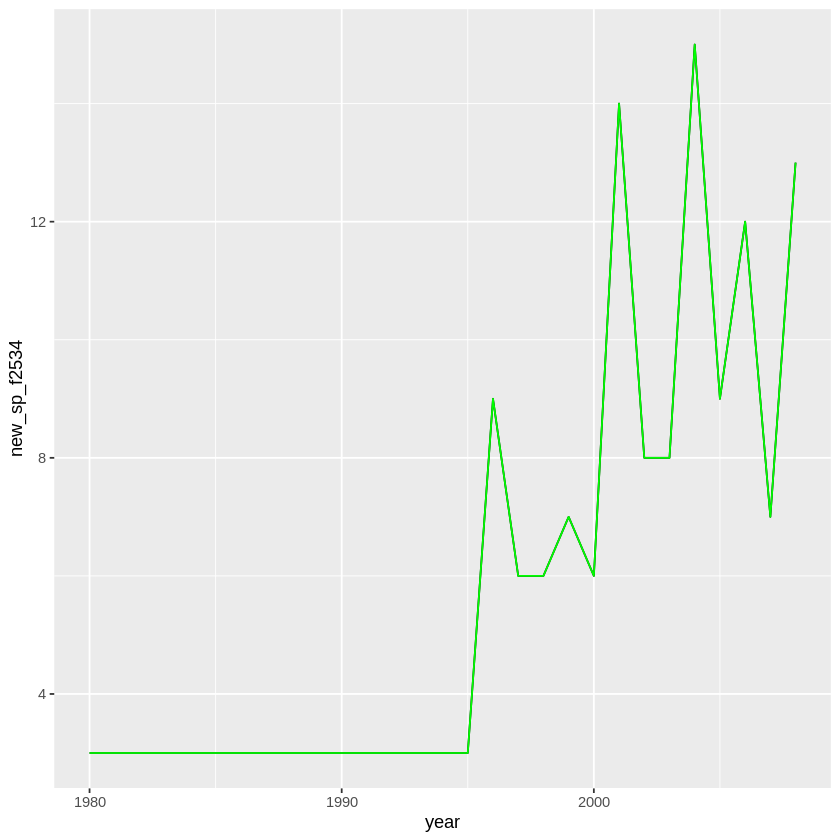

In [65]:
myPlotGr <- myPlot + geom_line(color='green')
myPlotGr

ggplot has a rich palette of colors, you can check them out here: http://sape.inf.usi.ch/quickreference/ggplot2/colour

Warning message:
“Removed 23 row(s) containing missing values (geom_path).”
Warning message:
“Removed 23 row(s) containing missing values (geom_path).”


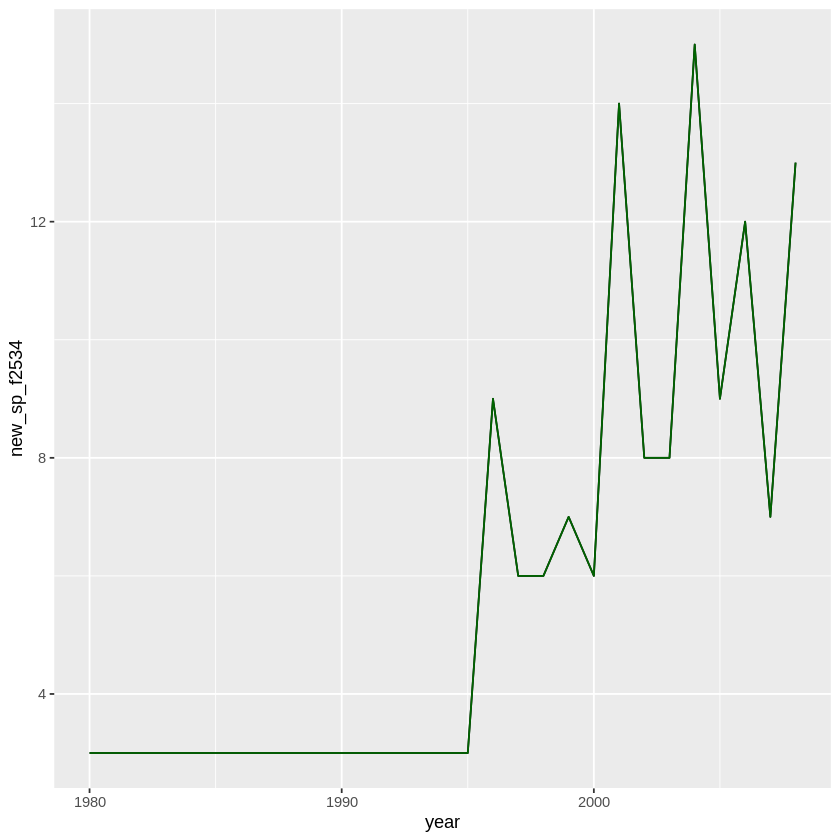

In [66]:
myPlotDGr <- myPlot + geom_line(color='darkgreen')
myPlotDGr

### We can add a title with the ggtitle() function…

Warning message:
“Removed 23 row(s) containing missing values (geom_path).”


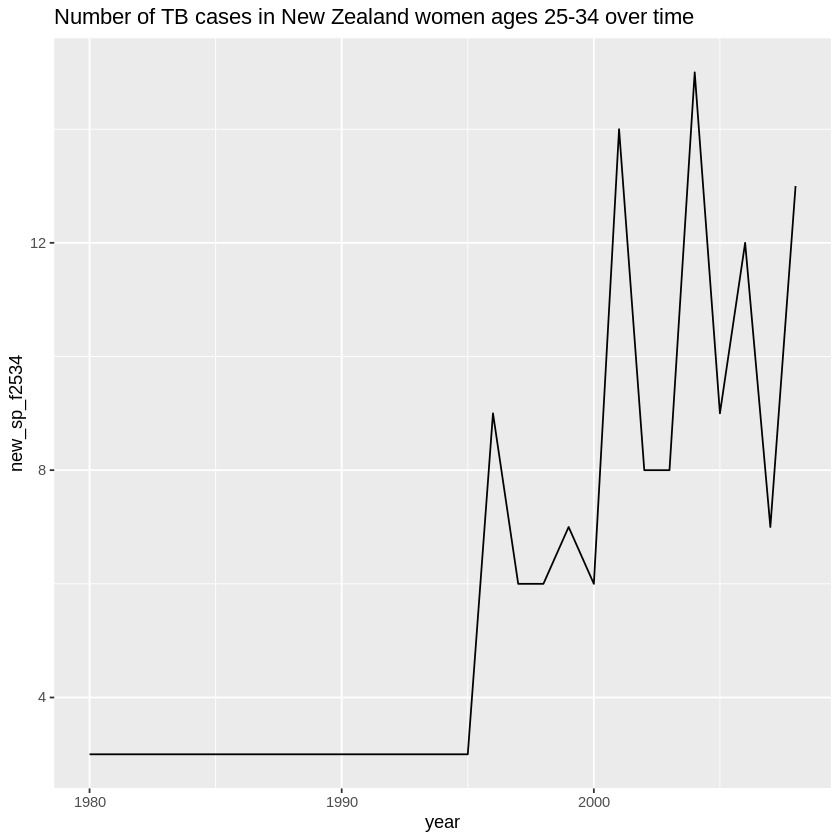

In [67]:
myPlot <- myPlot + ggtitle("Number of TB cases in New Zealand women ages 25-34 over time")
myPlot

### And even a subtitle

In [68]:
myPlot <- myPlot + ggtitle("Number of TB cases in New Zealand women ages 25-34 over time", subtitle="(Measured in years)")

### We can also change labels with xlab() and ylab() (“lab” stands for “label”)


In [69]:
myPlot <- myPlot + xlab("Year") + ylab("Positive TB cases")

### These steps can theoretically all be executed in a single line of code... 

But we took a step-wise approach so you can see the effect each element has on the graph. Let’s try and streamline this process:

Warning message:
“Removed 23 row(s) containing missing values (geom_path).”


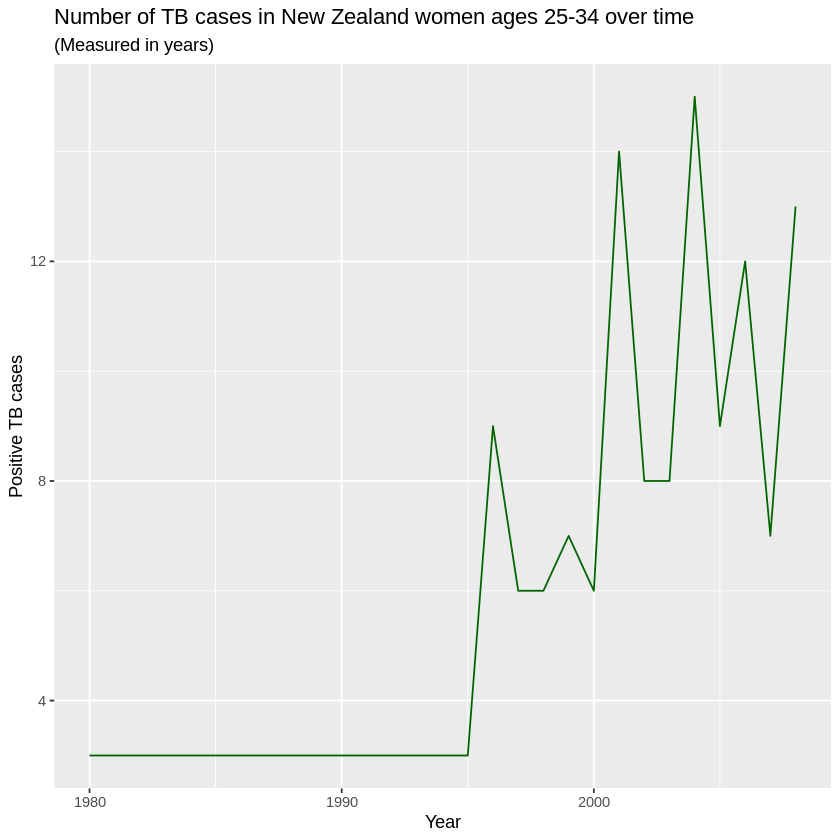

In [70]:
myPlot1 <- ggplot(tbNz) + aes(x=year, y=new_sp_f2534) + geom_line(color='darkgreen') + ggtitle("Number of TB cases in New Zealand women ages 25-34 over time", subtitle="(Measured in years)") + xlab("Year") + ylab("Positive TB cases")
myPlot1

### Drawing Histograms with ggplot

We have already used **R base** to create histograms with the **hist()** function. 

Let's try it again - let's create a histogram of the number of positive tests in the **new_sp_f2534** variable:

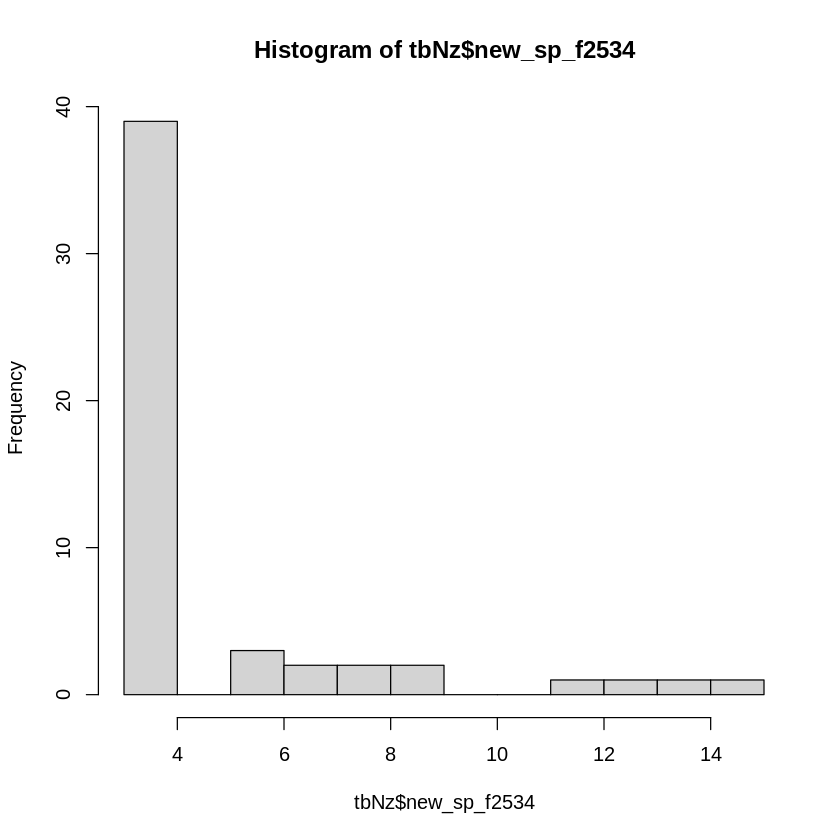

In [71]:
hist(tbNz$new_sp_f2534,breaks=10)

Now let's try the same thing but with ggplot:

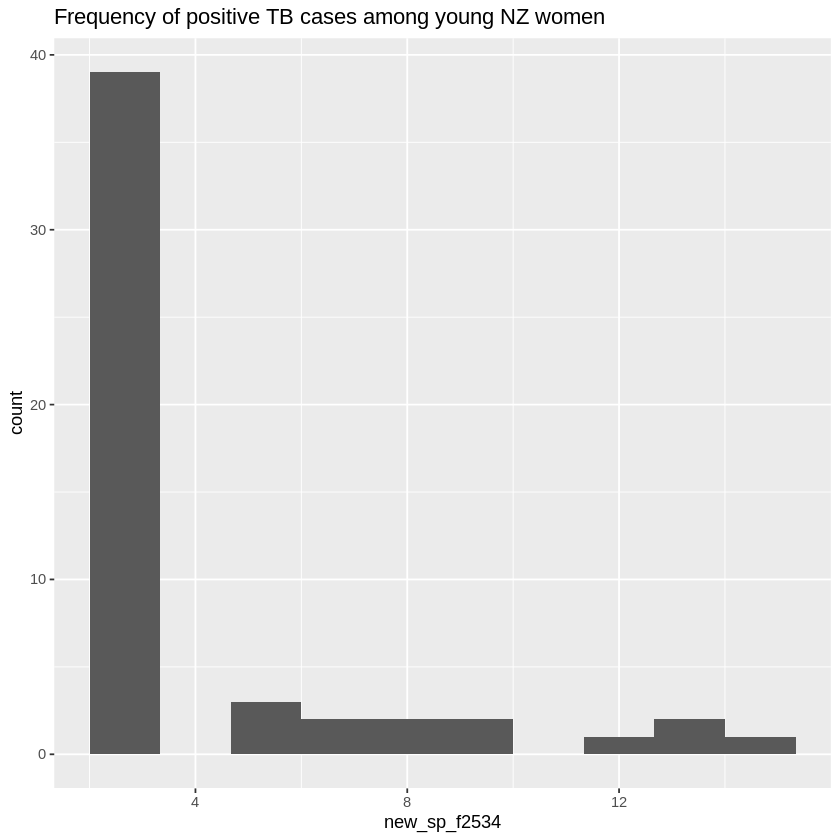

In [72]:
#Create the same histogram with ggplot
ggplot(tbNz, aes(x=new_sp_f2534)) + geom_histogram(bins=10) + ggtitle("Frequency of positive TB cases among young NZ women")

### Scatterplots with ggplot

How about some scatterplots? Remember what we said in class? Scatterplots are great for **analyzing the relationship between 2 variables.**

We can, for example, represent the relationship between positive TB tests among young NZ men and young NZ women: 

Warning message:
“Removed 38 rows containing missing values (geom_point).”


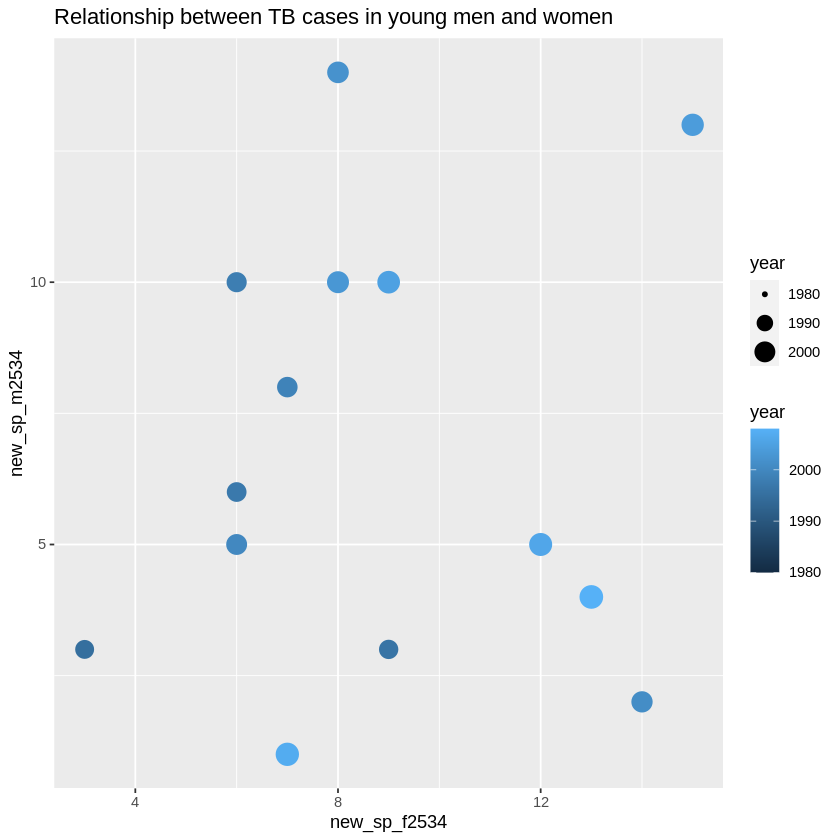

In [73]:
ggplot(tbNz, aes(x=new_sp_f2534, y=new_sp_m2534, color=year, size=year)) + geom_point() + ggtitle("Relationship between TB cases in young men and women")

We are interested in the relationship between **young women (plotted on the x-axis)** and **young men (plotted on the y-axis)** but there is actually a 3rd variable lurking in there as well: **Year**.

Even though not directly depicted, it determines the size and color of each point in the scatterplot.

### Let’s deconstruct this long line of code:
We told ggplot we want to use the **tbNz** df as our **data source**. Since ggplot is now only focusing on
that data, we don’t need to specify it every time like we do in base R – no $ business – when we refer to **new_sp_f2534** or **new_sp_m2534**, ggplot knows we mean the columns corresponding to
these names in the **tbNZ** df. It’s smart like that.

We then told ggplot we want to plot **new_sp_f2534** along the x-axis, **new_sp_m2534** along the y-axis, and we want
the **size** and **color** of the points in the scatterplot to be determined by **Year**.

Next, we asked ggplot to draw not a histogram, nor a line chart or anything else but a **scatterplot**
specifically by invoking the **geom_point()** function – **point** in this case represents the points we see in the scatterplot.

Lastly, we told ggplot to give a **title** to our plot, using the **ggtitle()** function.

Cool, isn’t it? Now it’s your turn to explore the many interesting features ggplot has.

**Just remember: Always follow the Dao of Data Viz!**

**P.S.: One last thing to help you with HW6:**

Using **vector math**, we can create a **new variable by combining the numbers from new_sp_m2534 and new_sp_f2534**. We can save the resulting vector as a **new variable in the **tbNz** df called **new_sp_combined2534**. This new variable represents the number of positive pulmonary smear tests for male AND female young people:



In [75]:
tbNz$new_sp_combined2534 <- c(tbNz$new_sp_m2534 + tbNz$new_sp_f2534)